In [42]:
import os
import gudhi
import sys
import numpy as np
import matplotlib.pyplot as plt
from itertools import chain
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

In [51]:
def insert(adj, u, v):
    adj[u].append(v)
    return
 
def printList(adj, V):
    for i in range(V):
        print(i, end = '')
        for j in adj[i]:
            print(' --> ' + str(j), end = '')
        print()
    print()
         
def convert(adj, V):
    matrix = [[0 for j in range(V)]
                 for i in range(V)]
    for i in range(V):
        for j in adj[i]:
            matrix[i][j] = 1
    return matrix
  
def printMatrix(adj, V):
    for i in range(V):
        for j in range(V):
            print(adj[i][j], end = ' ')
        print()
    print()

In [52]:
#data = pd.read_csv("DATA//PROTEINS//PROTEINS_A.txt", sep=",", header=None)
#data = pd.read_csv("DATA//aspirin//aspirin_A.txt", sep=",", header=None)
#data = pd.read_csv("DATA//BZR//BZR_A.txt", sep=",", header=None)
#points = pd.read_csv("DATA//BZR//BZR_node_attributes.txt", sep=",", header=None)

cloud = [[1, 1, 1], [7, 0, 5], [4, 6, 10], [9, 6, 1], [0, 14, 15], [2, 19, 7], [9, 17, 8]]

In [32]:
dim_adj = max(chain(data[0], data[1]))

adjList = [[] for i in range(dim_adj)]
  
for i in range(dim_adj):
    insert(adjList, data[0][i], data[1][i])

print("Adjacency List: ")
printList(adjList, dim_adj)
  
adjMatrix = convert(adjList, dim_adj)

Adjacency List: 
0
1 --> 2 --> 6 --> 20
2 --> 1 --> 3 --> 14
3 --> 2 --> 4 --> 21
4 --> 3 --> 5 --> 7
5 --> 4 --> 6 --> 11
6 --> 1 --> 5 --> 22
7 --> 4 --> 8 --> 12
8 --> 7 --> 9
9 --> 8 --> 10 --> 23 --> 24
10 --> 9 --> 11 --> 13
11 --> 5 --> 10 --> 25
12 --> 7 --> 15 --> 19
13 --> 10
14 --> 2
15 --> 12 --> 16 --> 26
16 --> 15 --> 17 --> 27
17 --> 16 --> 18 --> 28
18 --> 17 --> 19 --> 29
19 --> 12 --> 18 --> 30
20 --> 1
21 --> 3
22 --> 6
23 --> 9
24 --> 9
25 --> 11
26 --> 15
27 --> 16
28 --> 17
29 --> 18
30 --> 19
31 --> 32 --> 36 --> 51
32 --> 31 --> 33 --> 44
33 --> 32 --> 34 --> 52
34 --> 33 --> 35 --> 37
35 --> 34 --> 36 --> 41
36 --> 31 --> 35 --> 53
37 --> 34 --> 38 --> 42
38 --> 37 --> 39
39 --> 38 --> 40 --> 54 --> 55
40 --> 39 --> 41 --> 43
41 --> 35 --> 40 --> 50
42 --> 37 --> 45 --> 49
43 --> 40
44 --> 32
45 --> 42 --> 46 --> 56
46 --> 45 --> 47 --> 57
47 --> 46 --> 48 --> 58
48 --> 47 --> 49 --> 59
49 --> 42 --> 48 --> 60
50 --> 41 --> 61 --> 62 --> 63
51 --> 31
52 --> 33


In [33]:
cloud = []
for i in range(points.shape[0]):
    point = [points[0][i], points[1][i], points[2][i]]
    cloud.append(point)

In [58]:
rips_complex = gudhi.RipsComplex(points = cloud, max_edge_length = 15)
simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)

In [59]:
result_str = 'Rips complex is of dimension ' + repr(simplex_tree.dimension()) + ' - ' + \
    repr(simplex_tree.num_simplices()) + ' simplices - ' + \
    repr(simplex_tree.num_vertices()) + ' vertices.'
print(result_str)
fmt = '%s -> %.2f'
for filtered_value in simplex_tree.get_filtration():
    print(fmt % tuple(filtered_value))

Rips complex is of dimension 2 - 29 simplices - 7 vertices.
[0] -> 0.00
[1] -> 0.00
[2] -> 0.00
[3] -> 0.00
[4] -> 0.00
[5] -> 0.00
[6] -> 0.00
[0, 1] -> 7.28
[5, 6] -> 7.35
[1, 3] -> 7.48
[1, 2] -> 8.37
[0, 3] -> 9.43
[0, 1, 3] -> 9.43
[4, 5] -> 9.64
[2, 4] -> 10.25
[2, 3] -> 10.30
[1, 2, 3] -> 10.30
[0, 2] -> 10.72
[0, 1, 2] -> 10.72
[0, 2, 3] -> 10.72
[4, 6] -> 11.79
[4, 5, 6] -> 11.79
[2, 6] -> 12.25
[2, 4, 6] -> 12.25
[3, 6] -> 13.04
[2, 3, 6] -> 13.04
[2, 5] -> 13.49
[2, 4, 5] -> 13.49
[2, 5, 6] -> 13.49


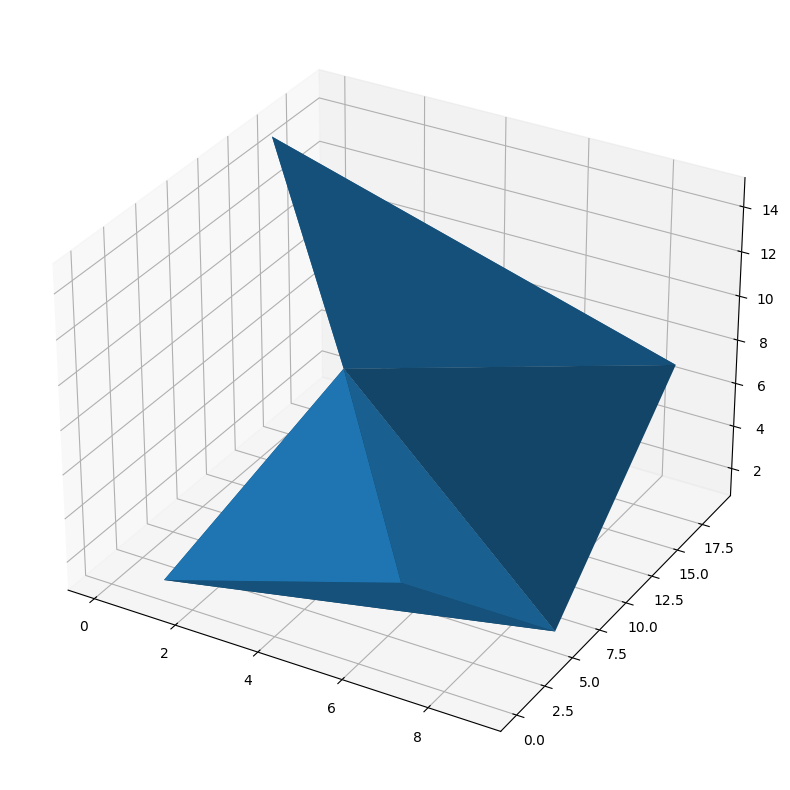

In [60]:
triangles = np.array([s[0] for s in simplex_tree.get_skeleton(2) if len(s[0])==3])
cloud = np.array(cloud)

fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(projection='3d')
ax.plot_trisurf(cloud[:, 0], cloud[:, 1], cloud[:, 2], triangles=triangles)
plt.show()